In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [5]:


# ---------------------------
# Load & quick exploration
# ---------------------------
df = pd.read_csv("bmw.csv")
print("🔹 First 5 rows of the dataset:")
print(df.head())
print("\n🔹 Dataset Info:")
print(df.info())
print("\n🔹 Missing Values:")
print(df.isnull().sum())
print("\n🔹 Summary Statistics:")
print(df.describe())
print("\n🔹 Dataset Shape:", df.shape)

🔹 First 5 rows of the dataset:
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      1

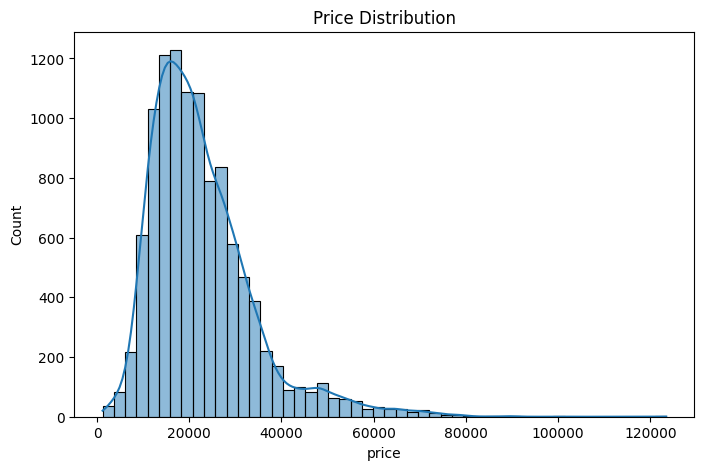

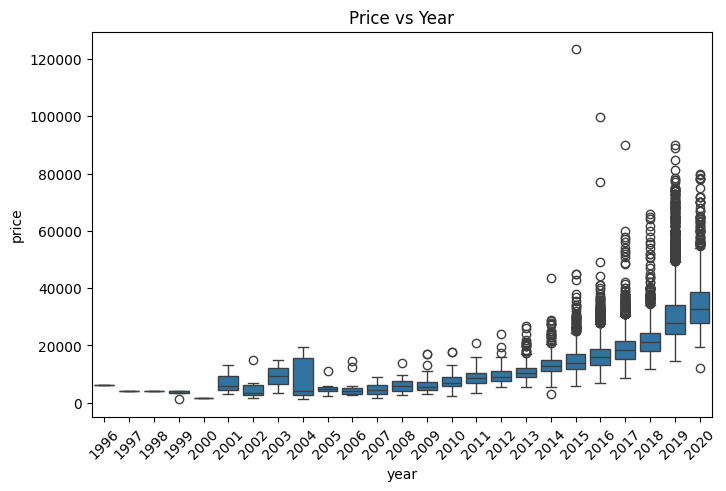

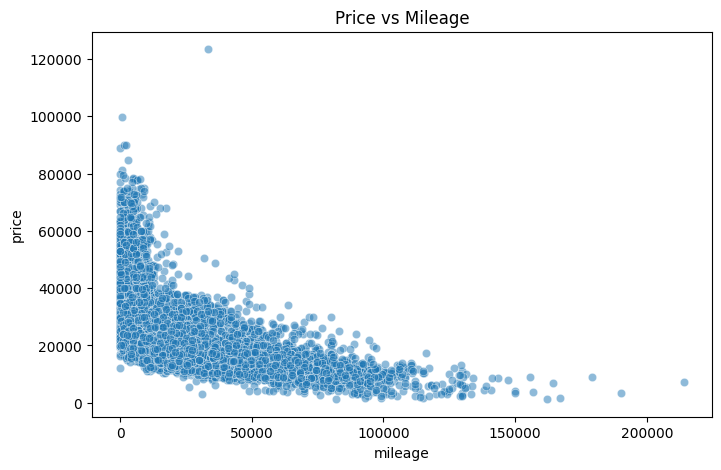

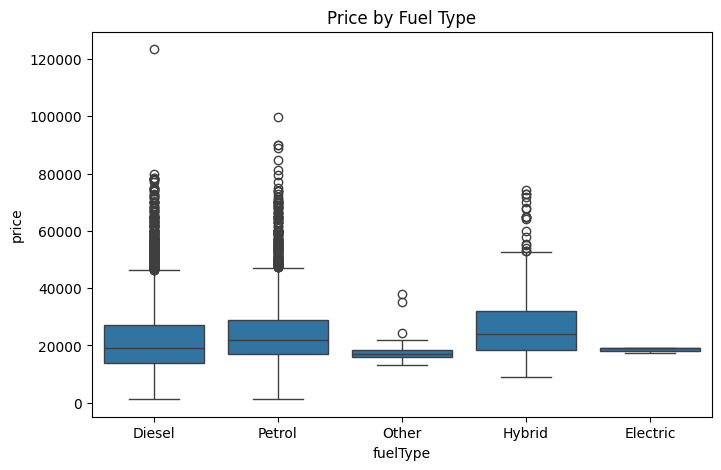

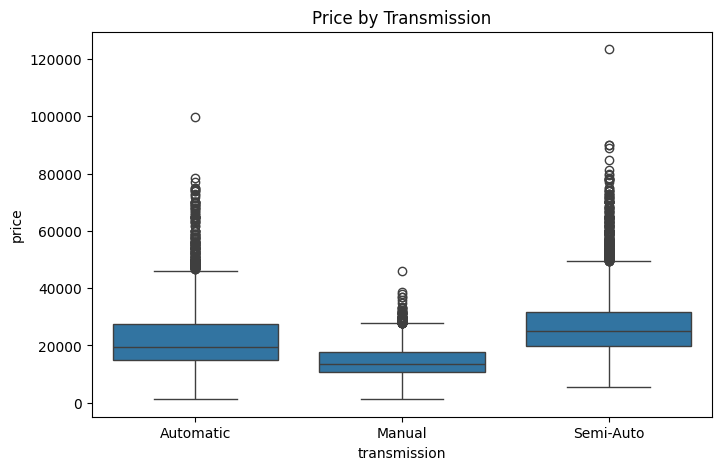

/tmp/ipython-input-670178643.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="engineSize", y="price", data=df, ax=ax[0], ci=None)
/tmp/ipython-input-670178643.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="engineSize", y="price", data=df, ax=ax[1], estimator=len, ci=None)


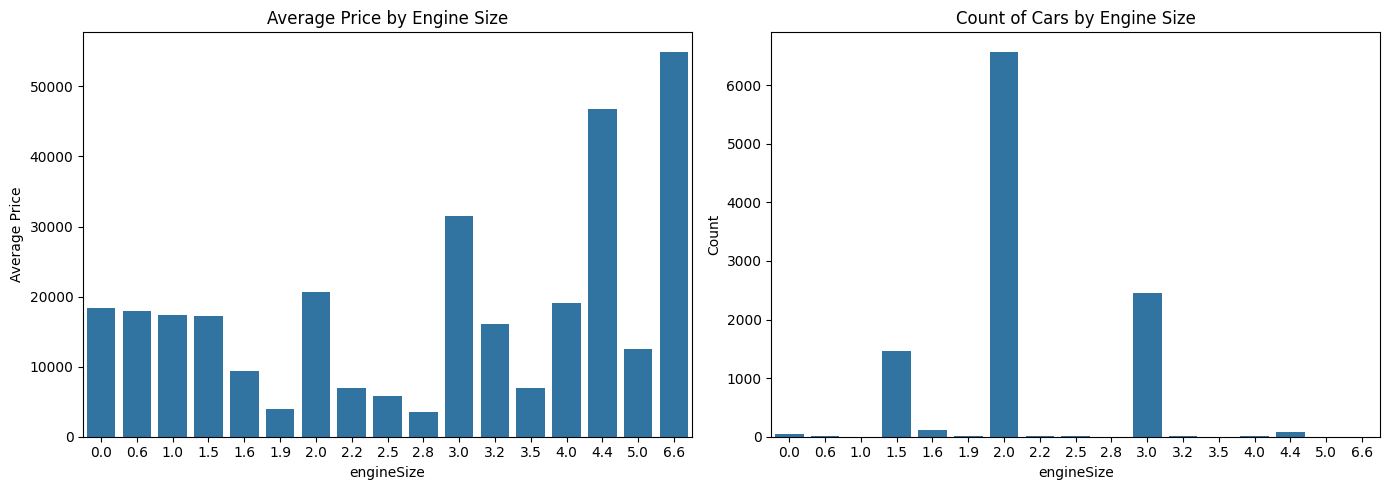

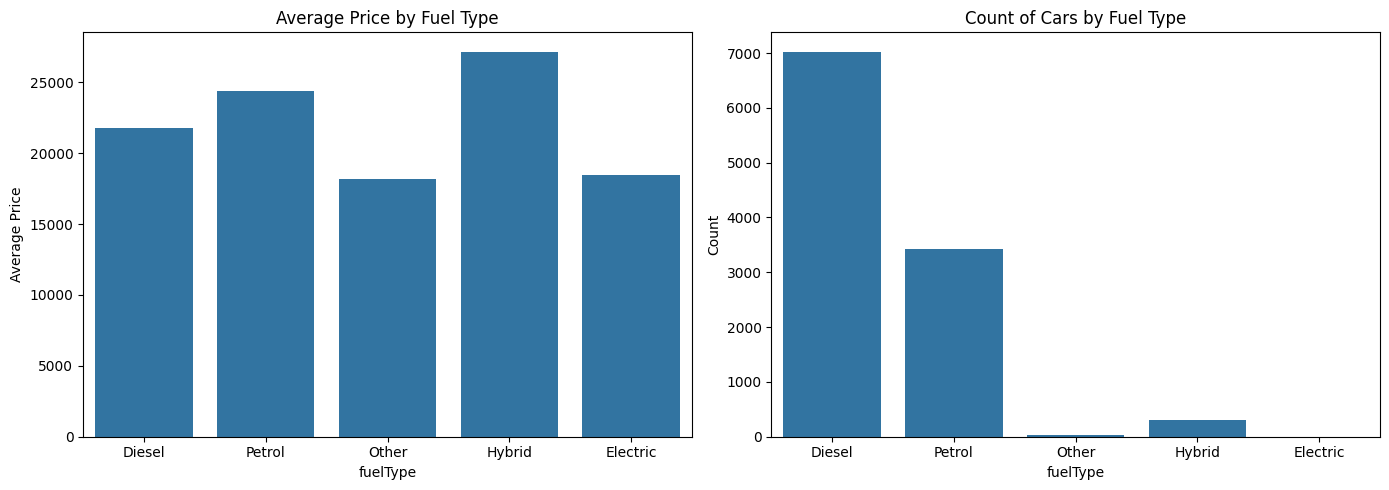

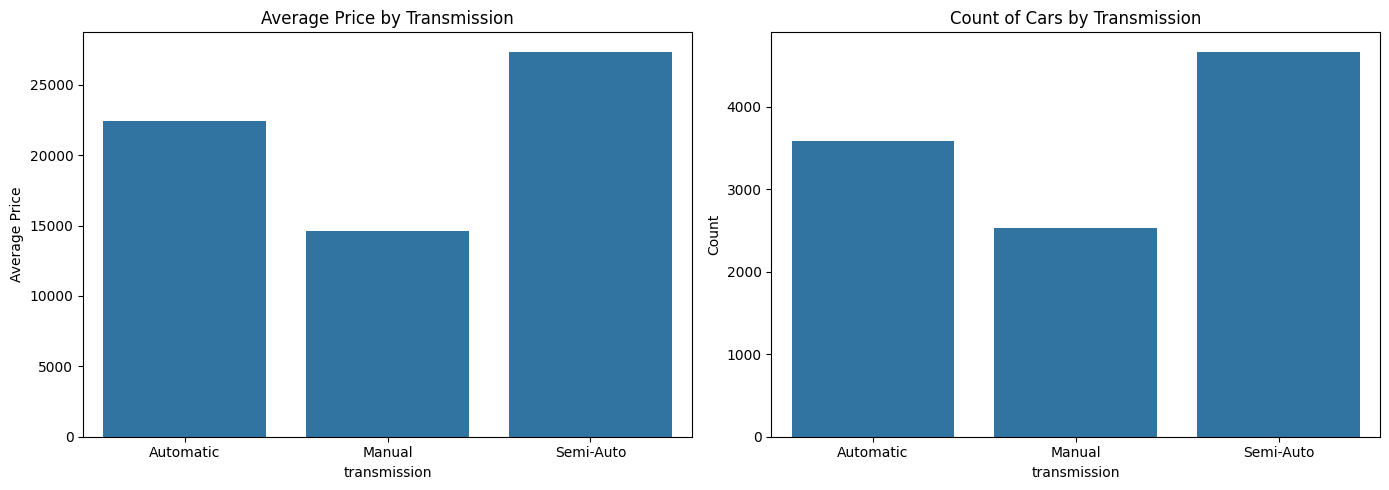

In [6]:
# ---------------------------
# Visual EDA (extended)
# ---------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of price
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Price vs Year
plt.figure(figsize=(8,5))
sns.boxplot(x='year', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price vs Year")
plt.show()

# Price vs Mileage
plt.figure(figsize=(8,5))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.5)
plt.title("Price vs Mileage")
plt.show()

# Categorical: Fuel Type
plt.figure(figsize=(8,5))
sns.boxplot(x='fuelType', y='price', data=df)
plt.title("Price by Fuel Type")
plt.show()

# Categorical: Transmission
plt.figure(figsize=(8,5))
sns.boxplot(x='transmission', y='price', data=df)
plt.title("Price by Transmission")
plt.show()

# ---------------------------
# Engine size analysis
# ---------------------------
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Average price by engine size
sns.barplot(x="engineSize", y="price", data=df, ax=ax[0], ci=None)
ax[0].set_title("Average Price by Engine Size")
ax[0].set_ylabel("Average Price")

# Count of cars by engine size
sns.barplot(x="engineSize", y="price", data=df, ax=ax[1], estimator=len, ci=None)
ax[1].set_title("Count of Cars by Engine Size")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


# ---------------------------
# Fuel Type analysis
# ---------------------------
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Average price by fuel type
sns.barplot(x="fuelType", y="price", data=df, ax=ax[0], errorbar=None)
ax[0].set_title("Average Price by Fuel Type")
ax[0].set_ylabel("Average Price")

# Count of cars by fuel type
sns.barplot(x="fuelType", y="price", data=df, ax=ax[1], estimator=len, errorbar=None)
ax[1].set_title("Count of Cars by Fuel Type")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# ---------------------------
# Transmission analysis
# ---------------------------
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Average price by transmission
sns.barplot(x="transmission", y="price", data=df, ax=ax[0], errorbar=None)
ax[0].set_title("Average Price by Transmission")
ax[0].set_ylabel("Average Price")

# Count of cars by transmission
sns.barplot(x="transmission", y="price", data=df, ax=ax[1], estimator=len, errorbar=None)
ax[1].set_title("Count of Cars by Transmission")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [7]:
# ---------------------------
# Cleaning
# ---------------------------
# cap unrealistic values & remove inconsistent categories
df = df[df['price'] < 80000]
df = df[df['mileage'] < 150000]
df = df[df['engineSize'] > 0.9]                 # remove 0 and 0.6; keep 1.0+
df = df[~df['fuelType'].isin(['Electric', 'Other'])]
df['model'] = df['model'].str.strip()
df = df[(df['mpg'] >= 5) & (df['mpg'] <= 100)]

print("✅ Cleaned dataset shape:", df.shape)
print("✅ Fuel types remaining:", df['fuelType'].unique())
print("✅ Engine size range:", df['engineSize'].min(), "to", df['engineSize'].max())

✅ Cleaned dataset shape: (10490, 9)
✅ Fuel types remaining: ['Diesel' 'Petrol' 'Hybrid']
✅ Engine size range: 1.5 to 6.6


In [8]:
# ---------------------------
# ▶ FEATURE ENGINEERING (add here)
# ---------------------------
# Age (ensure no zero/negative; dataset max year is 2020, so 2025-year >= 5)
df['age'] = 2025 - df['year']

# Guard against any accidental divide-by-zero (shouldn’t happen, but safe)
df['age'] = df['age'].replace(0, 1)

# Your engineered features
df['eng_age'] = df['engineSize'] / df['age']
df['mpg_eng'] = df['mpg'] / df['engineSize']
df['mpg_age'] = df['mpg'] / df['age']

# Extra useful signals
df['mileage_per_year'] = df['mileage'] / df['age']
df['tax_per_engine'] = df['tax'] / df['engineSize']

# Replace inf/-inf from any divisions and drop if still problematic
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['eng_age','mpg_eng','mpg_age','mileage_per_year','tax_per_engine'], inplace=True)

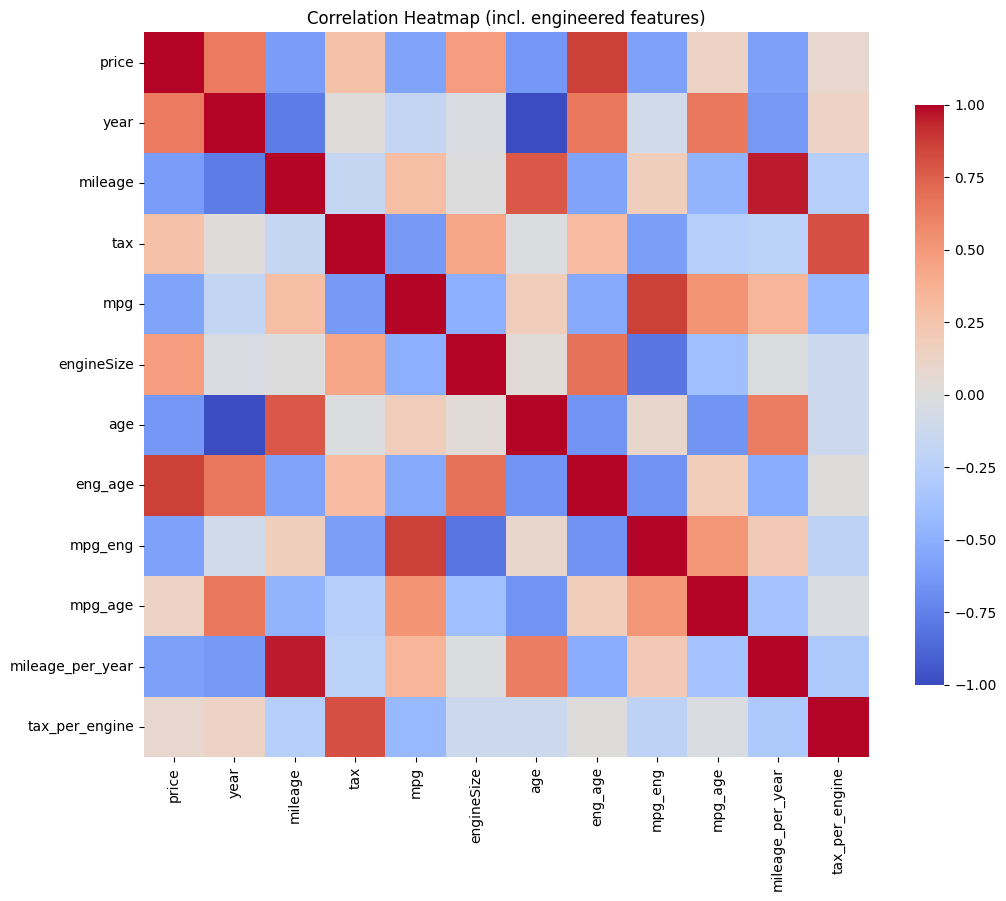

In [9]:
# ---------------------------
# Correlation Heatmap (on numeric features incl. engineered + target)
# ---------------------------
numeric_for_corr = [
    'price', 'year', 'mileage', 'tax', 'mpg', 'engineSize',
    'age', 'eng_age', 'mpg_eng', 'mpg_age', 'mileage_per_year', 'tax_per_engine'
]

corr = df[numeric_for_corr].corr()

plt.figure(figsize=(11,9))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, vmin=-1, vmax=1, square=True,
            cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (incl. engineered features)")
plt.tight_layout()
plt.show()

In [10]:
# ---------------------------
# Baseline: OHE + Linear Regression
# ---------------------------
# Features and target
X = df.drop("price", axis=1)
y = df["price"]

# Categorical + Numerical split
categorical = ["model", "transmission", "fuelType"]
# Include engineered features in the numerical list
numerical = [
    "year", "mileage", "tax", "mpg", "engineSize",
    "age", "eng_age", "mpg_eng", "mpg_age", "mileage_per_year", "tax_per_engine"
]

# OneHotEncoding for categorical
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_cat = encoder.fit_transform(X[categorical])

# Scaling numerical
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical])

# Combine features
X_preprocessed = np.hstack((X_num, X_cat))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print(X_num)
print(X_cat)


Train shape: (8392, 36) Test shape: (2098, 36)
[[-1.3092177   1.68135634 -0.13653872 ... -0.92472368  1.43877996
   0.02479668]
 [ 0.38928815 -0.42169927  0.19506773 ... -0.48186963 -0.27913394
   0.40306262]
 [-0.45996477  1.50929876  0.44377257 ... -0.68524475  1.81872937
  -0.32194709]
 ...
 [-0.03533831  0.00667336  1.10698547 ... -0.8674016   0.18083483
   1.44329395]
 [-1.3092177   0.79296922 -1.71166936 ... -0.62206307  0.57260941
  -1.77196651]
 [-0.03533831  1.37395539 -0.13653872 ...  0.06580194  2.01383274
   0.02479668]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("📊 Baseline Linear Regression (with engineered features)")
print("MAE:", mae); print("RMSE:", rmse); print("R² Score:", r2)


📊 Baseline Linear Regression (with engineered features)
MAE: 2107.075060591547
RMSE: 2932.0448139096393
R² Score: 0.9311348796157605


In [12]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00


In [13]:
from category_encoders import TargetEncoder
import xgboost as xgb

X = df.drop("price", axis=1)
y = df["price"]

categorical_high = ["model"]                          # Target Enc
categorical_low  = ["transmission", "fuelType"]       # OHE
numerical = [
    "year", "mileage", "tax", "mpg", "engineSize",
    "age", "eng_age", "mpg_eng", "mpg_age", "mileage_per_year", "tax_per_engine"
]

te = TargetEncoder(cols=categorical_high)
X_model_te = te.fit_transform(X[categorical_high], y)

encoder_low = OneHotEncoder(drop="first", sparse_output=False)
X_cat_low = encoder_low.fit_transform(X[categorical_low])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical])

X_preprocessed = np.hstack((X_num, X_model_te, X_cat_low))

X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42
)

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("📊 XGBoost (with engineered features + TE(model))")
print("MAE:", mae); print("RMSE:", rmse); print("R² Score:", r2)

📊 XGBoost (with engineered features + TE(model))
MAE: 1417.282470703125
RMSE: 2082.666680004268
R² Score: 0.965254545211792


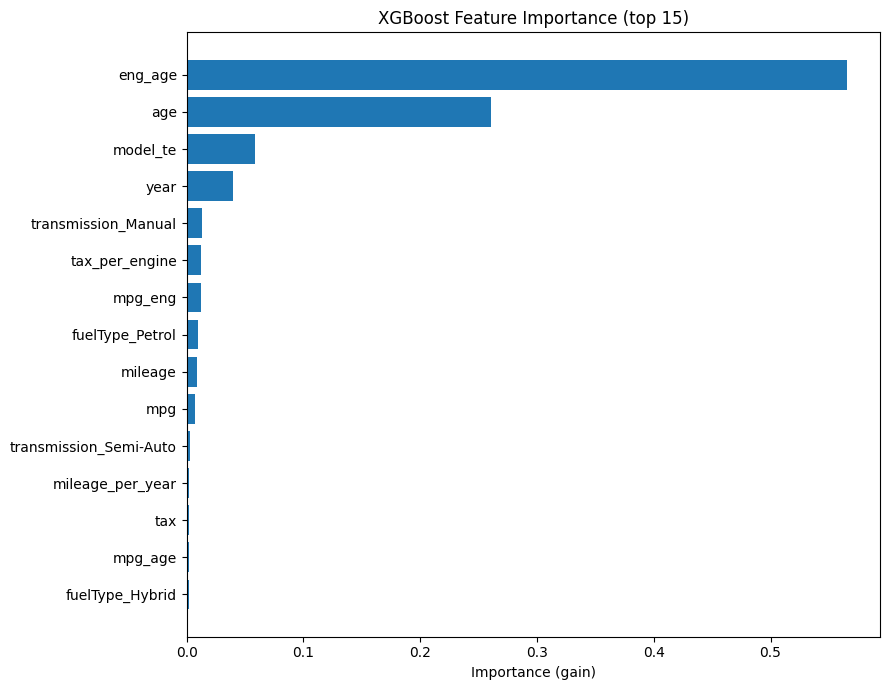

,feature,importance
6,eng_age,0.565469
5,age,0.260463
11,model_te,0.058211
0,year,0.039404
12,transmission_Manual,0.012986
10,tax_per_engine,0.012561
7,mpg_eng,0.012039
15,fuelType_Petrol,0.009470
1,mileage,0.009166
3,mpg,0.007256


In [14]:
# ---- Build readable feature names in the same order as X_preprocessed ----
# 1) numerical columns (already scaled)
num_feature_names = numerical[:]  # keep original names

# 2) target-encoded high-cardinality column(s)
# TargetEncoder collapses 'model' to a single numeric column
te_feature_names = [f"{col}_te" for col in categorical_high]  # e.g., ['model_te']

# 3) one-hot low-cardinality columns
ohe_feature_names = list(encoder_low.get_feature_names_out(categorical_low))

all_feature_names = num_feature_names + te_feature_names + ohe_feature_names

# ---- Pull importance from the fitted XGBoost model ----
# Option A: sklearn-style attribute (default importance = 'gain')
importances = xgb_model.feature_importances_

# Sanity check: lengths must match
assert len(importances) == len(all_feature_names), (
    f"Feature name count ({len(all_feature_names)}) != importance count ({len(importances)})"
)

# ---- Create a sorted importance table ----
import pandas as pd
imp_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# ---- Plot: Top 15 features ----
import matplotlib.pyplot as plt

top_k = 15
plot_df = imp_df.head(top_k).iloc[::-1]  # reverse for horizontal barh

plt.figure(figsize=(9, 7))
plt.barh(plot_df["feature"], plot_df["importance"])
plt.title(f"XGBoost Feature Importance (top {top_k})")
plt.xlabel("Importance (gain)")
plt.tight_layout()
plt.show()

# Also print the table
display(imp_df.head(25))